In [10]:
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')

import torch
torch.cuda.get_device_name(0)
#torch.cuda.set_device(0)

'GeForce GTX 960M'

In [11]:
classes = ['baseball', 'basketball', 'football', 'handball', 'pingpong', 'tennis', 'volleyball']

In [13]:
for c in classes:
    verify_images("sport/train/"+c, delete=True)
    verify_images("sport/test/"+c, delete=True)

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [4]:
data = ImageDataBunch.from_folder(path="sport", train="train", test="test", valid_pct=0.25, ds_tfms=get_transforms(), size=224, bs=16).normalize(imagenet_stats)

In [9]:
data

ImageDataBunch;

Train: LabelList (788 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
baseball,baseball,baseball,baseball,baseball
Path: sport;

Valid: LabelList (262 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
basketball,pingpong,handball,volleyball,baseball
Path: sport;

Test: LabelList (568 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: sport

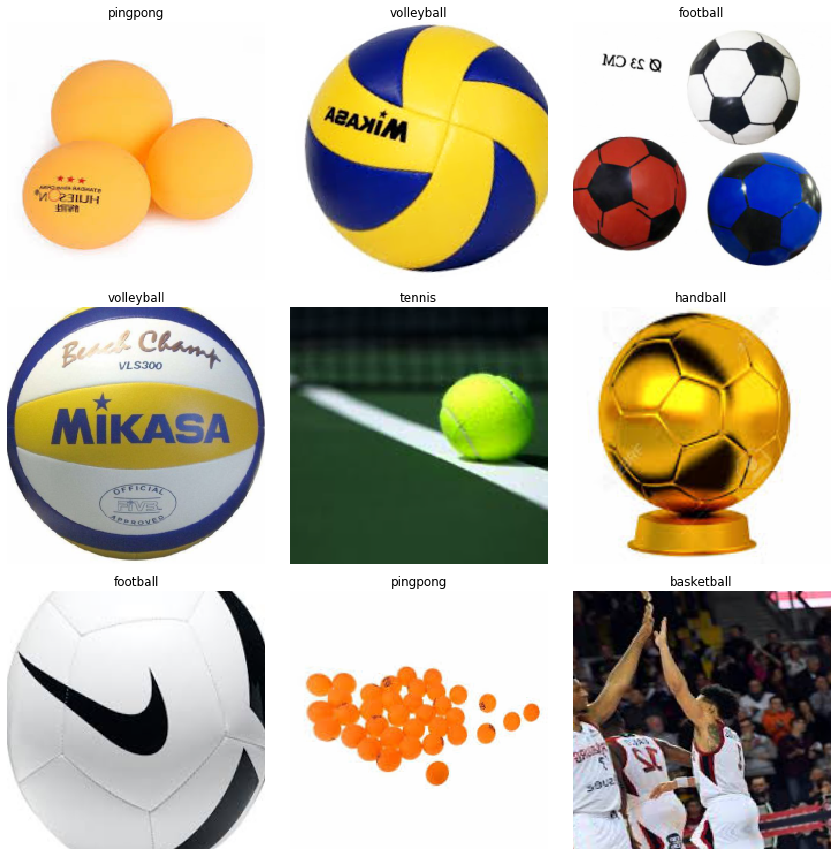

In [5]:
data.show_batch(rows=3)

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


UnidentifiedImageError: Caught UnidentifiedImageError in DataLoader worker process 3.
Original Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\torch\utils\data\_utils\worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "C:\Users\Admin\anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\Users\Admin\anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\Users\Admin\anaconda3\lib\site-packages\fastai\data_block.py", line 655, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "C:\Users\Admin\anaconda3\lib\site-packages\fastai\data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "C:\Users\Admin\anaconda3\lib\site-packages\fastai\vision\data.py", line 271, in get
    res = self.open(fn)
  File "C:\Users\Admin\anaconda3\lib\site-packages\fastai\vision\data.py", line 267, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "C:\Users\Admin\anaconda3\lib\site-packages\fastai\vision\image.py", line 398, in open_image
    x = PIL.Image.open(fn).convert(convert_mode)
  File "C:\Users\Admin\anaconda3\lib\site-packages\PIL\Image.py", line 2862, in open
    "cannot identify image file %r" % (filename if filename else fp)
PIL.UnidentifiedImageError: cannot identify image file 'C:\\Users\\Admin\\Documents\\deep-learning\\AI-sport-recognition\\sport\\train\\handball\\kharkiv-ukraine-september-14-2017-260nw-718694968.jpg'


In [ ]:
learn.recorder.plot(suggestion=True)

In [9]:
#lr = learn.recorder.min_grad_lr
#learn.fit_one_cycle(4, slice(lr))
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time


BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
learn.save("4epoch")
#learn.load("4epoch")

In [ ]:
# fine tuning
learn.unfreeze()

In [ ]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
img = open_image('thomas.jpg')

ypred = learn.predict(img)

from IPython.display import Image
Image(filename='thomas.jpg') 

category = data.classes[ypred[1].item()]
print(category)